In [1]:
import sys
import os
import cv2
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
from utils import *
%matplotlib inline

Using TensorFlow backend.


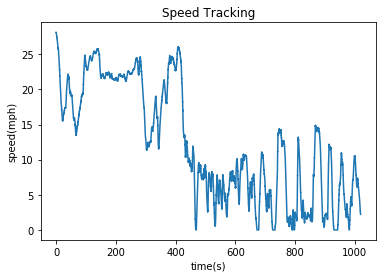

In [2]:
train_speed = np.loadtxt('./data/train.txt')
total_frame = train_speed.shape[0]
plt.plot(np.arange(0,len(train_speed)/20,1/20),train_speed)
plt.xlabel('time(s)')
plt.ylabel('speed(mph)')
plt.title('Speed Tracking')
plt.show()

In [3]:
info = pd.read_csv('./data/info.csv')
info['avg_speed'] = info.label.rolling(window=2).mean()
curPaths= [None]
for i in range(total_frame-1):
    curPaths.append('./data/training_frames/' + str(i)+'.jpg')
info['curImgPath'] = curPaths
info = info.drop(info.index[0])
info = info.rename(columns={'path':'nxtImgPath'})
info = info.reset_index(drop=True)
info.head()

,frame,nxtImgPath,label,avg_speed,curImgPath
0,1,./data/training_frames\1.jpg,28.105569,28.105569,./data/training_frames/0.jpg
1,2,./data/training_frames\2.jpg,28.106527,28.106048,./data/training_frames/1.jpg
2,3,./data/training_frames\3.jpg,28.130404,28.118465,./data/training_frames/2.jpg
3,4,./data/training_frames\4.jpg,28.109243,28.119823,./data/training_frames/3.jpg
4,5,./data/training_frames\5.jpg,28.088572,28.098907,./data/training_frames/4.jpg


In [4]:
shuffled = sklearn.utils.shuffle(info)
train_number =int(total_frame*0.7)
validation_number = int(total_frame*0.2)
test_number = int(total_frame*0.1)

train_info = shuffled.iloc[:train_number]
validation_info = shuffled.iloc[train_number:train_number+validation_number]
test_info = shuffled.iloc[train_number+validation_number:]
print('train_number: ' + str(len(train_info)))
print('validation number: ' + str(len(validation_info)))
print('test_number: ' + str(len(test_info)))

train_number: 14280
validation number: 4080
test_number: 2039


In [5]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = 'nvidia_2.h5'
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=1, 
                              verbose=1, 
                              min_delta = 0.2,
                              mode='min',)
modelCheckpoint = ModelCheckpoint(filepath, 
                                  monitor = 'val_loss', 
                                  save_best_only = True, 
                                  mode = 'min', 
                                  verbose = 1,
                                 save_weights_only = True)
callbacks_list = [modelCheckpoint]
train_generator = batch_generator(train_info)
valid_generator = batch_generator(validation_info)


In [6]:
model = nvidia_model()
history = model.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_info)//16, 
        epochs = 15,
        callbacks = callbacks_list,
        verbose = 1,
        validation_data = valid_generator,
        validation_steps = len(validation_info)//16)

#print(history)

Epoch 1/15


C:\Users\Troy\Desktop\speed Challenge\utils.py:51: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(fx*fx+fy*fy)


 21/892 [..............................] - ETA: 12:11 - loss: 94.1113

KeyboardInterrupt: 